**Attribute Information:**

For more information, read [Cortez and Morais, 2007].
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
6. DMC - Duff Moisture Code index from the FWI system: 1.1 to 291.3
7. DC - Drought Code index from the FWI system: 7.9 to 860.6
8. ISI - Initial Spread index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,6

In [17]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [18]:
df_copy = df.copy()

In [5]:
months = {'jan': 1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7,'aug':8,'sep':9,'oct':10,'nov':11, 'dec':12}
days = {'sun':1, 'mon':2,'tue':3,'wed':4,'thu':5,'fri':6,'sat':7}

In [6]:
df['month_number'] = df['month'].map(months)
df['day_number'] = df['day'].map(days)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_number,day_number
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,6
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,3
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,7
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,6
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,1


In [7]:
df['is_fire'] = (df['area'] != 0).map({True: 1, False: 0})

In [8]:
df_fire = df[df['is_fire'] == 1]
df_fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_number,day_number,is_fire
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,7,3,1
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,9,3,1
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,9,2,1
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,8,4,1
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,8,6,1


## Visualize the number of fire in each month

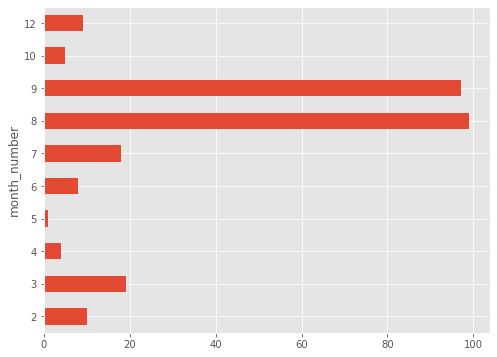

In [9]:
month_fire = df_fire.groupby('month_number')['is_fire'].sum()
plt.style.use('ggplot')
month_fire.plot(kind='barh')

## Visualize the number of fire in week day

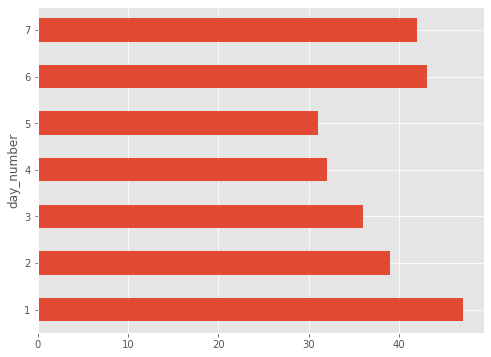

In [10]:
day_fire = df_fire.groupby('day_number')['is_fire'].sum()

day_fire.plot(kind='barh')

## Visualize correlation of each feature to the burnt area size

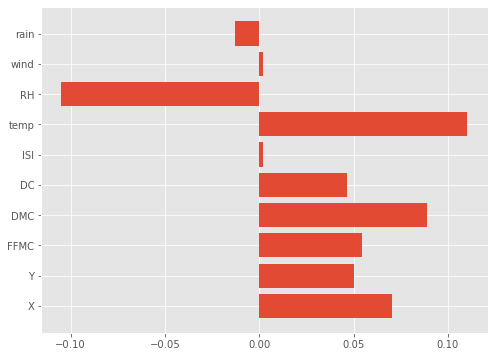

In [11]:
corr_fire = df_fire.drop(['is_fire','month_number','day_number'], axis=1).corr()
a = corr_fire.drop('area', axis=0)['area']

fig, ax = plt.subplots(figsize=(8,6))
ax.barh(a.index, a.values)
plt.show()

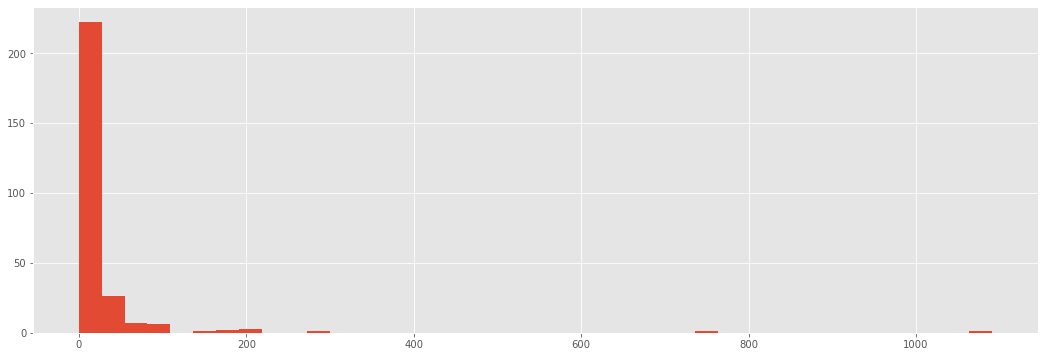

In [16]:
plt.figure(figsize=(18,6))
plt.hist(df_fire['area'], bins=40)
plt.show()

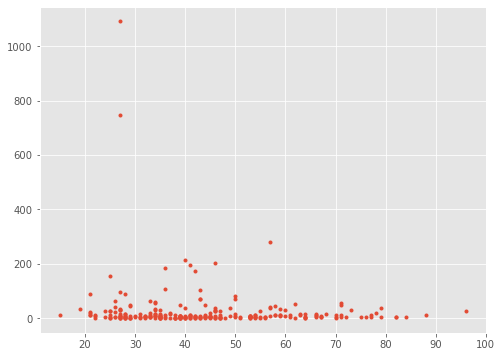

In [25]:
plt.plot(df_fire['RH'], df_fire['area'], linestyle='none', marker='.')
plt.show()

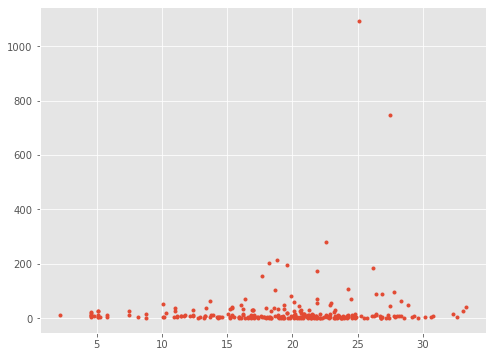

In [26]:
plt.plot(df_fire['temp'], df_fire['area'], linestyle='none', marker='.')
plt.show()

In [19]:
df_copy.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [20]:
df_copy['is_fire'] = (df['area'] != 0).map({True:1, False:0})
df_copy.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,is_fire
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [21]:
df_copy['is_fire'].value_counts()

1    270
0    247
Name: is_fire, dtype: int64

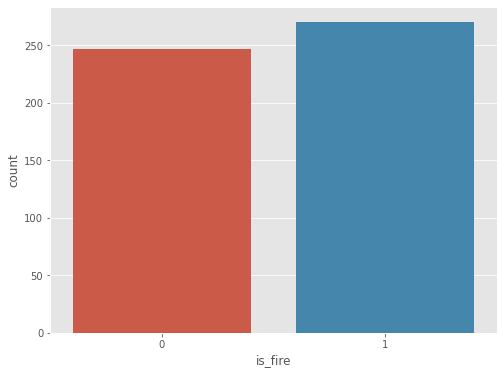

In [29]:
sns.countplot(df_copy['is_fire'])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder


In [178]:
X = df_copy.drop(['area','is_fire'], axis=1)
y = df_copy['is_fire']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(413, 12) (413,) (104, 12) (104,)


In [179]:
#function to transfrom result from oh to dataframe
def transform_to_df(result, ohe):
    df = pd.DataFrame(result, columns = ohe.categories_[0])
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    return df

In [180]:
ohe_month = OneHotEncoder(handle_unknown='ignore', sparse=False)
month_data = X_train['month'].values.reshape(-1,1)
ohe_month.fit(month_data)
month_result = ohe_month.transform(month_data)
# df_month = pd.DataFrame(month_result, columns = ohe_month.categories_)
# df_month.head()

ohe_day = OneHotEncoder(handle_unknown='ignore',sparse = False)
day_data = X_train['day'].values.reshape(-1,1)
ohe_day.fit(day_data)
day_result = ohe_day.transform(day_data)

In [181]:
df_month = transform_to_df(month_result, ohe_month)
df_day = transform_to_df(day_result, ohe_day)

In [182]:
X_train = X_train.reset_index(drop=True)

In [183]:
X_train = pd.concat([X_train, df_month, df_day], axis=1)
X_train.shape

(413, 30)

In [184]:
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,may,oct,sep,fri,mon,sat,sun,thu,tue,wed
0,2,5,jun,thu,93.7,121.7,350.2,18.0,22.7,40,...,0,0,0,0,0,0,0,1,0,0
1,9,5,jun,wed,93.3,49.5,297.7,14.0,28.0,34,...,0,0,0,0,0,0,0,0,0,1
2,3,4,sep,sun,92.4,124.1,680.7,8.5,22.5,42,...,0,0,1,0,0,0,1,0,0,0
3,4,4,sep,sun,92.4,124.1,680.7,8.5,16.9,60,...,0,0,1,0,0,0,1,0,0,0
4,8,3,sep,thu,93.7,80.9,685.2,17.9,23.2,26,...,0,0,1,0,0,0,0,1,0,0


In [185]:
X_train.drop(['month','day'], axis=1, inplace=True)

In [186]:
X_train.shape

(413, 28)

In [187]:
#Test set
X_test = X_test.reset_index(drop=True)

month_test_data = X_test['month'].values.reshape(-1,1)
day_test_data = X_test['day'].values.reshape(-1,1)

month_test_result = ohe_month.transform(month_test_data)
day_test_result = ohe_day.transform(day_test_data)

df_month_test = transform_to_df(month_test_result, ohe_month)
df_day_test = transform_to_df(day_test_result, ohe_day)

X_test = pd.concat([X_test, df_month_test, df_day_test], axis=1)
X_test.drop(['month','day'], axis=1, inplace=True)

In [188]:
X_test.shape

(104, 28)

In [189]:
X_test.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,may,oct,sep,fri,mon,sat,sun,thu,tue,wed
0,8,3,88.2,96.2,229.0,4.7,14.3,79,4.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,2,5,90.3,290.0,855.3,7.4,16.2,58,3.6,0.0,...,0,0,1,1,0,0,0,0,0,0
2,6,5,92.2,102.3,751.5,8.4,19.7,35,1.8,0.0,...,0,0,1,0,0,1,0,0,0,0
3,4,3,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,1
4,7,4,84.6,3.2,43.6,3.3,8.2,53,9.4,0.0,...,0,0,0,1,0,0,0,0,0,0


### Classification

In [190]:
steps = [('scaler',StandardScaler()),
        ('pca', PCA()),
        ('logreg', LogisticRegression())]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
train_acc_score = pipeline.score(X_train, y_train)
test_acc_score = pipeline.score(X_test, y_test)
print(train_acc_score, test_acc_score)

0.585956416464891 0.5673076923076923


In [191]:
from sklearn.neighbors import KNeighborsClassifier

In [192]:
steps = [('scaler',StandardScaler()),
            ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
train_acc_score = pipeline.score(X_train, y_train)
test_acc_score = pipeline.score(X_test, y_test)
print(train_acc_score, test_acc_score)

0.6731234866828087 0.6538461538461539


In [193]:
from sklearn.tree import DecisionTreeClassifier

In [194]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
train_acc_score = dt.score(X_train, y_train)
test_acc_score = dt.score(X_test, y_test)
print(train_acc_score, test_acc_score)

0.9903147699757869 0.5865384615384616


In [195]:
from sklearn.ensemble import RandomForestClassifier

In [196]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
train_acc_score = forest.score(X_train, y_train)
test_acc_score = forest.score(X_test,y_test)
print(train_acc_score, test_acc_score)

0.9903147699757869 0.6442307692307693


In [197]:
y_pred = forest.predict(X_test)
pd.DataFrame(data=confusion_matrix(y_test, y_pred),\
            index=['True 0', 'True 1'],\
            columns = ['Predicted 0', 'Predicted 1'])

,Predicted 0,Predicted 1
True 0,33,17
True 1,20,34


In [198]:
y_pred = forest.predict(X_train)
pd.DataFrame(data=confusion_matrix(y_train, y_pred),\
            index=['True 0', 'True 1'],\
            columns = ['Predicted 0', 'Predicted 1'])

,Predicted 0,Predicted 1
True 0,195,2
True 1,2,214


In [199]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_depth=1, random_state=7)
adb_clf = AdaBoostClassifier(base_estimator = dt, n_estimators=100)
adb_clf.fit(X_train, y_train)
train_acc_score = adb_clf.score(X_train, y_train)
test_acc_score = adb_clf.score(X_test,y_test)
print(train_acc_score, test_acc_score)

0.7893462469733656 0.5961538461538461


In [200]:
X_train.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'oct',
       'sep', 'fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')